# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest
from joblib import dump, load

# Data Import

In [2]:
X_train = pd.read_csv("./data/train.csv")
X_test = pd.read_csv("./data/test.csv")

# Train Isolation Forest Model

In [5]:
clf = IsolationForest(max_samples=100, random_state=16, contamination=0.001)
clf.fit(X_train.values)

IsolationForest(contamination=0.001, max_samples=100, random_state=16)

# Draw Decision Boundary

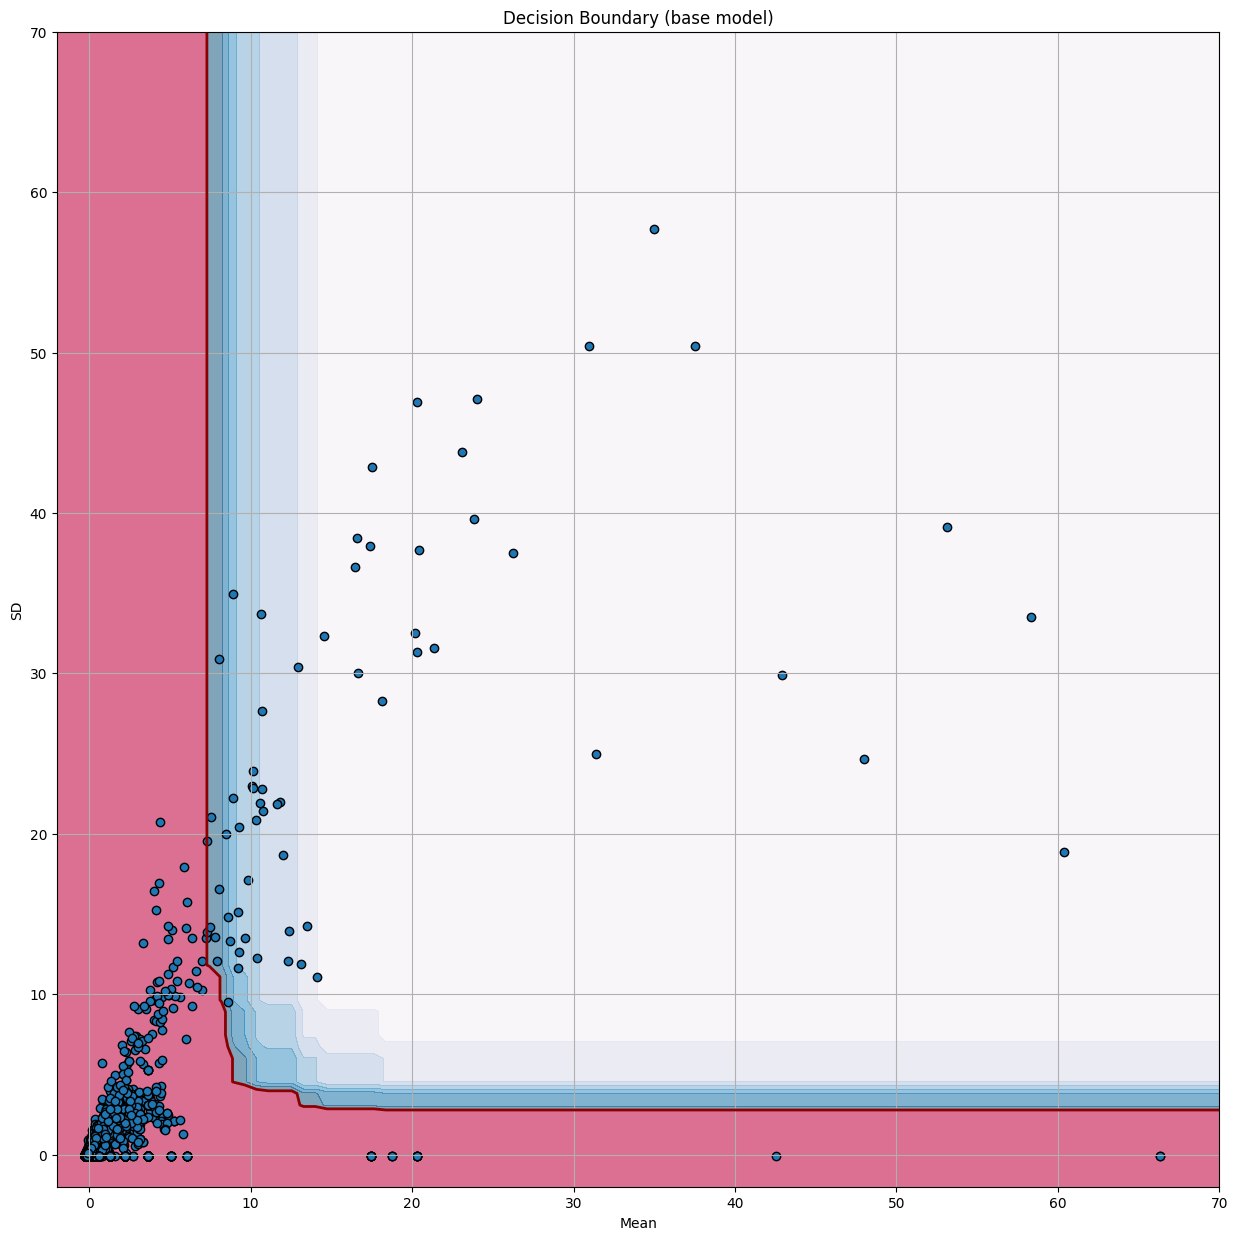

In [6]:
# Change the plot's size.
plt.rcParams['figure.figsize'] = [15, 15]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(X_train.iloc[:, 0],
            X_train.iloc[:, 1],
            edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

# Prediction on Test Data

In [9]:
test_predictions = clf.predict(X_test.values)

In [10]:
X_merge = pd.concat([X_test, pd.Series(test_predictions)], axis=1)
current_columns = X_merge.columns.to_list()
current_columns[-1] = "label"
X_merge.columns = current_columns

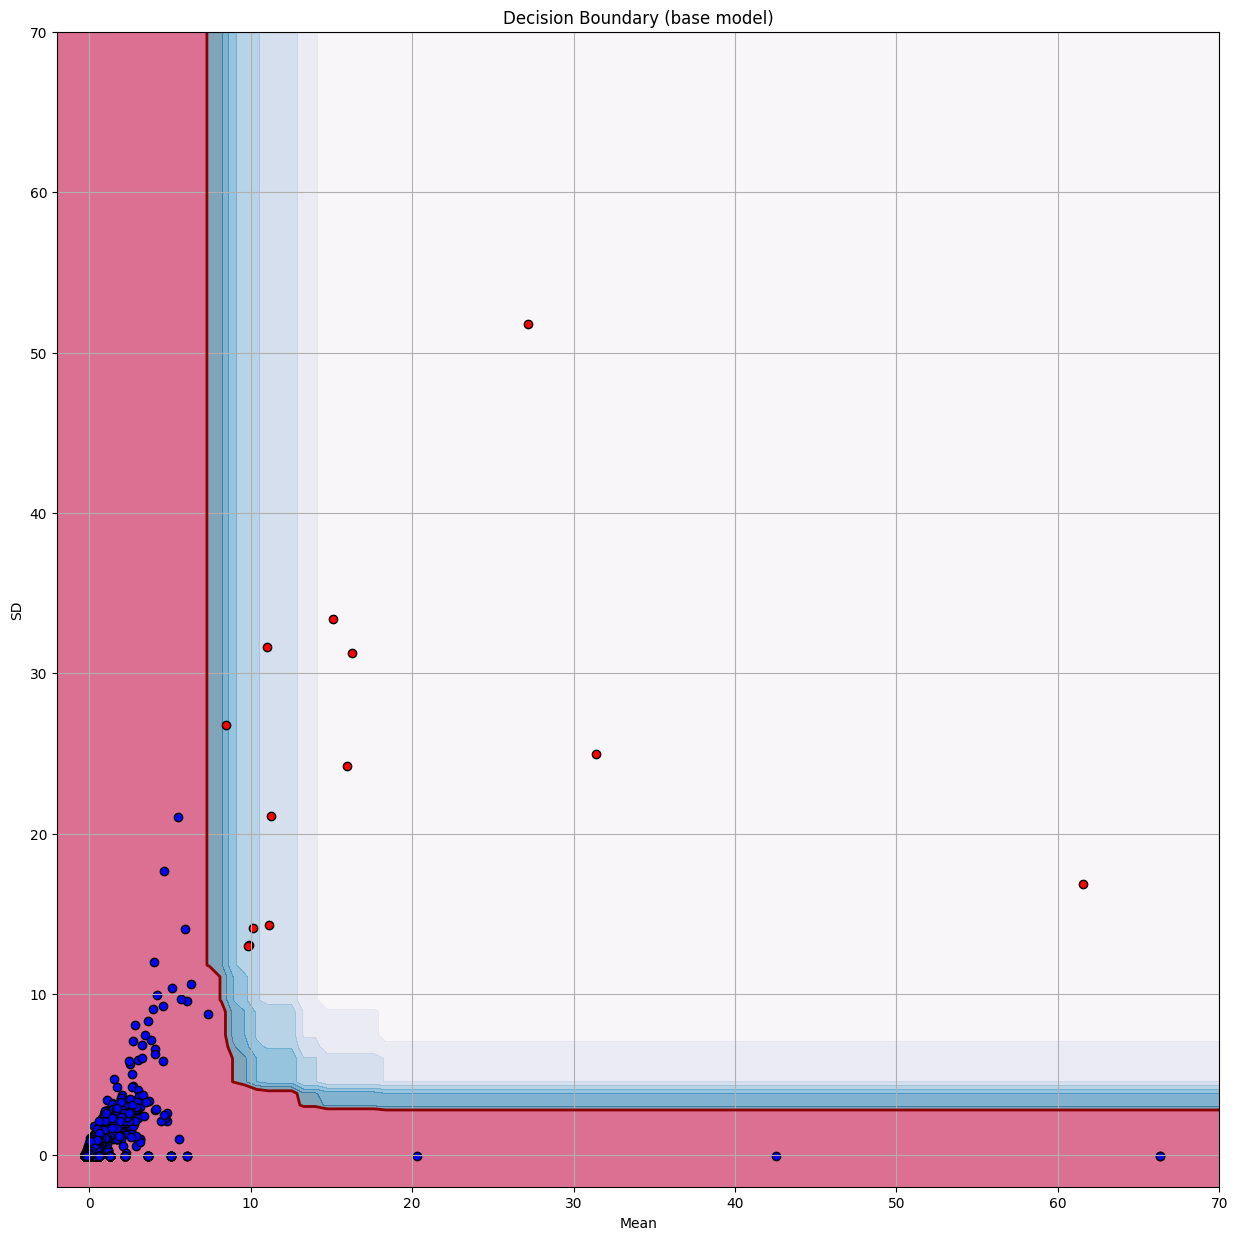

In [11]:
# Change the plot's size.
plt.rcParams['figure.figsize'] = [15, 15]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

# plot the predicted inliers in the test data:
inliners_df = X_merge[X_merge["label"] == 1]
plt.scatter(inliners_df.iloc[:, 0],
            inliners_df.iloc[:, 1],
            color='blue',
            edgecolors='k')

# plot the predicted outliers in the test data:
outliers_df = X_merge[X_merge["label"] == -1]
plt.scatter(outliers_df.iloc[:, 0],
            outliers_df.iloc[:, 1],
            color='red',
            edgecolors='k')

plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

# Export the model

In [12]:
dump(clf, 'model.joblib')

['model.joblib']